# K vecinos más cercanos (K Nearest Neighbors)

En este notebook estudiaremos cómo utilizar el clasificador k-NN de scikit-learn y distintas formas de medir su funcionamiento.

## Conjunto de datos

Usaremos un conjunto de datos sobre cáncer de mama en el que se usan 30 variables, extraídas a partir de imágenes, para tratar de predecir si la paciente tiene o no la enfermedad.

https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset

In [4]:
from sklearn.datasets import load_breast_cancer

breast = load_breast_cancer()

print('Names of the features:', breast['feature_names'])
print('Names of classes:', breast['target_names'])
print('Number of instances and features:', breast['data'].shape)

Names of the features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Names of classes: ['malignant' 'benign']
Number of instances and features: (569, 30)


In [5]:
import pandas as pd

# Crear la tabla y añadir una columna con la clase que se trata de predecir
df = pd.DataFrame(data=breast['data'], columns=breast['feature_names'])
df['result'] = breast['target']
df['result'] = df['result'].map({0: 'malignant', 1: 'benign'})

df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,result
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,malignant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,malignant
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,malignant
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,malignant
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,malignant


In [6]:
# Número de ejemplos en cada clase
df['result'].value_counts()

benign       357
malignant    212
Name: result, dtype: int64

In [7]:
# Frecuencia de las clases
df['result'].value_counts() / df['result'].count() * 100

benign       62.741652
malignant    37.258348
Name: result, dtype: float64

En este caso la clase "benigna" es más frecuente que la benigna (aprox. 2/3 frente a 1/3).

## Normalización de los datos

Las variables de este conjunto de datos son numéricas pero de una escala muy diferente por lo que para usar determinadas técnicas (como las basadas en distancia, como el k-NN, y en regresión de variables, como las redes neuronales) suele ser conveniente escalar los datos.

__IMPORTANTE: Recuerda escalar los datos__.

In [8]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
from sklearn.preprocessing import MinMaxScaler

# Normalizamos los datos escalándolos al intervalo [0,1]
scaler = MinMaxScaler()
scaler.fit(breast['data'])
breast['data_scaled'] = scaler.transform(breast.data) # Lo almacenamos en el dataset original

In [10]:
# Creamos un nuevo dataframe con los datos escalados
df_scaled = pd.DataFrame(data=breast['data_scaled'], columns=breast['feature_names'])
df_scaled['result'] = breast['target']
df_scaled['result'] = df_scaled['result'].map({0: 'malignant', 1: 'benign'})
df_scaled.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.338222,0.323965,0.332935,0.216920,0.394785,0.260601,0.208058,0.243137,0.379605,0.270379,...,0.296663,0.363998,0.283138,0.170906,0.404138,0.220212,0.217403,0.393836,0.263307,0.189596
std,0.166787,0.145453,0.167915,0.149274,0.126967,0.161992,0.186785,0.192857,0.138456,0.148702,...,0.171940,0.163813,0.167352,0.139932,0.150779,0.152649,0.166633,0.225884,0.121954,0.118466
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.223342,0.218465,0.216847,0.117413,0.304595,0.139685,0.069260,0.100944,0.282323,0.163016,...,0.180719,0.241471,0.167837,0.081130,0.300007,0.116337,0.091454,0.223127,0.185098,0.107700
50%,0.302381,0.308759,0.293345,0.172895,0.390358,0.224679,0.144189,0.166501,0.369697,0.243892,...,0.250445,0.356876,0.235320,0.123206,0.397081,0.179110,0.181070,0.343402,0.247782,0.163977
75%,0.416442,0.408860,0.416765,0.271135,0.475490,0.340531,0.306232,0.367793,0.453030,0.340354,...,0.386339,0.471748,0.373475,0.220901,0.494156,0.302520,0.305831,0.554639,0.318155,0.242949
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
df_scaled.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,result
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,malignant
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,malignant
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,malignant
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,malignant
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,malignant


## Conjuntos de entrenamiento y test

Podemos utilizar distintas técnicas para medir el funcionamiento de un clasificador (train/test split, leave one out, cross validation, ...). Una de las técnicas más habituales consiste en dividir el conjunto de datos en dos partes: entrenamiento y prueba. Entrenamos el clasificador con el conjunto de entrenamiento y probamos su funcionamiento con el conjunto de prueba. __Es muy importante que las métricas de clasificación se midan sobre un conjunto de datos distinto del que se usó para entrenar al clasificador__.

Además, en este caso las clases no están balanceadas (2/3 y 1/3) por lo que debemos hacer una __partición estratificada__ que mantenga esa proporción en los dos conjuntos de datos.

Finalmente, fíjate que __las clases de sklearn trabajan siempre con arrays de numpy y no con dataframes de Pandas__. Los datos del dataset original están en arrays así que podemos usarlos directamente. Si necesitáramos acceder al array que hay en un dataframe también podríamos hacerlo mediante el atributo _data_.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# Como la proporción de clases a predecir está desbalanceada (2/3 y 1/3) es importante
# usar la versión estratificada que mantiene la proporción de elementos de cada clase
# al hacer la partición
# En este caso usamos el 80% de instancias como conjunto de entrenamiento y el 20% como
# conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(breast['data_scaled'], breast['target'],
                                                    test_size=0.20, stratify=breast['target'],
                                                    random_state=55)

# Creamos el clasificador k-NN
# Podemos fijar los pesos como 'uniform' o inv. proporcionales a la distancia 'distance'
clf = KNeighborsClassifier(n_neighbors=3, weights='distance')

# Entrenar el clasificador
clf.fit(X_train, y_train)

# Medir la tasa de aciertos o exactitud (accuracy) en los conjuntos de entrenamiento y test
train_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)

train_accuracy, test_accuracy

(1.0, 0.9649122807017544)

El valor de accuracy para el conjunto de entrenamiento siempre es más alto que para el conjunto de test (¡al final y al cabo estamos prediciendo datos que se han usado para entrenar el modelo!). De hecho, en el caso de k-NN siempre será del 100% porque el algoritmo almacena todos los datos de entrenamiento. __Siempre debemos calcular las métricas sobre el conjunto de prueba__ si queremos obtener valores reales sobre el funcionamiento del clasificador.

## Matriz de confusión

La matriz de confusión nos permite ver el número de instancias real de cada clase y el número de instancias predichas por el clasificador. Permite comprobar fácilmente las clases que el clasificador confunde con mayor frecuencia.

Las filas de la matriz muestran el número de instancias reales de cada clase. Las columnas de la matriz muestran el número de instancias predichas por el clasificador en cada clase. Los elementos de la diagonal son los que se han predicho correctamente.

In [13]:
from sklearn.metrics import confusion_matrix

y_test_predicted =clf.predict(X_test)

confusion_matrix(y_test, y_test_predicted)

array([[40,  2],
       [ 2, 70]])

También podemos dibujar la matriz de confusión de forma gráfica con la siguiente función auxiliar.

In [14]:
# Función extraída de
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


Normalized confusion matrix
[[0.95238095 0.04761905]
 [0.02777778 0.97222222]]


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

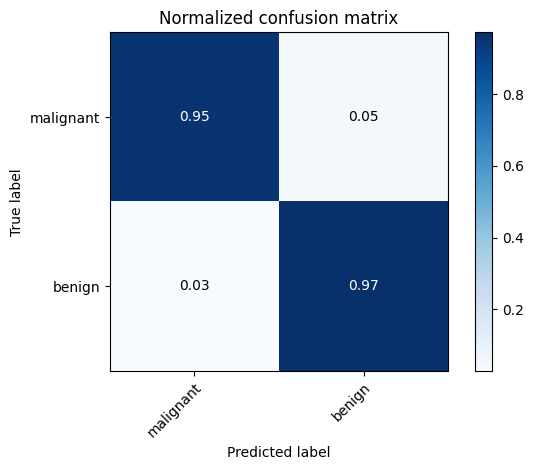

In [15]:
# El parámetro normalize permite mostrar los porcentajes en lugar del número de instancias
plot_confusion_matrix(y_test, y_test_predicted, breast['target_names'], normalize=True)

## Validación cruzada

La técnica de validación cruzada nos permite obtener métricas sobre el comportamiento de un clasificador mucho más representativas de su funcionamiento real. Se divide el conjunto de datos en K partes y se entrena el clasificador K veces usando cada vez una parte distinta como conjunto de prueba (y el resto como conjunto de entrenamiento). Las métricas sobre el funcionamiento del clasificador se obtienen calculando la media de las obtenidas en las K iteraciones.

https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation

__Nota: no confundir la K de la validación cruzada con la K de los vecinos más cercanos, son variables distintas__.

In [16]:
from sklearn.model_selection import cross_validate
import numpy as np

# Creamos el clasificador k-NN
clf = KNeighborsClassifier(n_neighbors=3, weights='distance')

# Validación cruzada dividiendo el conjunto de datos en 10 partes (folds)
# cross_validate usa validación estratificada para problemas de clasificación binaria o multiclase
scores = cross_validate(clf, breast['data_scaled'], breast['target'], scoring='accuracy',
                        cv=10, return_train_score=False)

# scores es un diccionario con datos sobre tiempos y exactitud (accuracy)
scores

{'fit_time': array([0.00126076, 0.00072408, 0.00068521, 0.00066495, 0.00065947,
        0.0006206 , 0.00064111, 0.00062108, 0.00060129, 0.00060606]),
 'score_time': array([0.00235701, 0.00210977, 0.00195026, 0.00186849, 0.00177288,
        0.00178385, 0.00173521, 0.00172162, 0.00169277, 0.00170064]),
 'test_score': array([0.96491228, 0.94736842, 0.94736842, 0.98245614, 1.        ,
        1.        , 0.92982456, 0.98245614, 0.98245614, 0.96428571])}

In [17]:
print('Accuracy mean:', np.mean(scores['test_score']))
print('Accuracy std:', np.std(scores['test_score']))

Accuracy mean: 0.9701127819548871
Accuracy std: 0.022276264602112666


## Seleccionando el valor de k para k-NN

Podemos seleccionar el valor óptimo de vecinos más cercanos usando validación cruzada con distintos valores de k.

In [18]:
# Medias y desviaciones típicas de accuracy para distintos valores de k
accuracy_mean = []
accuracy_std = []

k_values = range(1,15)
for k in k_values:
    # Entrenar y validar
    clf = KNeighborsClassifier(k, weights='distance')
    scores = cross_validate(clf, breast['data_scaled'], breast['target'], scoring='accuracy', cv=10)

    accuracy_mean.append(np.mean(scores['test_score']))
    accuracy_std.append(np.std(scores['test_score']))

accuracy_mean

[0.9542293233082708,
 0.9542293233082708,
 0.9701127819548871,
 0.9736215538847117,
 0.9666353383458647,
 0.9683897243107771,
 0.9666040100250626,
 0.9718984962406015,
 0.9666353383458647,
 0.9701127819548871,
 0.9718984962406015,
 0.9718671679197994,
 0.9701127819548871,
 0.9736215538847117]

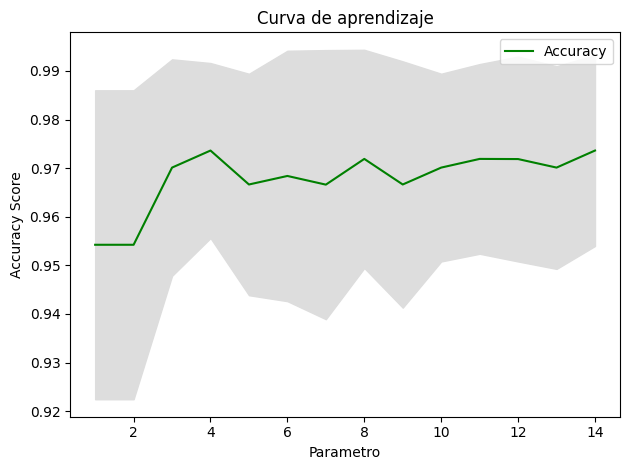

In [19]:
# Dibujamos la línea con la accuracy (exactitud) en el test
plt.plot(k_values, accuracy_mean, color="g", label="Accuracy")

# Dibujamos la banda de la desviación típica
lower_limit = np.array(accuracy_mean) - np.array(accuracy_std)
upper_limit = np.array(accuracy_mean) + np.array(accuracy_std)
plt.fill_between(k_values, lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

¿Qué valor de k seleccionarías a la vista de los resultados?
k = 4

## Métricas detalladas por clase

Cuando las clases están descompensadas, el valor de exactitud (accuracy) obtenido por el clasificador puede no ser demasiado representativo de su funcionamiento. En estos casos conviene calcular los valores de precisión (precision), exahustividad (recall) y la medida F1 (F1 score) para cada una de las clases, además de los valores agregados.

Empezamos calculando los valores agregados haciendo una media ponderada de los valores de cada clase según el número de instancias de cada clase.

In [20]:
# Importamos las métricas que vamos a evaluar para cada una de las clases
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.model_selection import cross_validate

# Escribimos las métricas que queremos evaluar
# Precisión, Exhausitividad y F1 se calculan para cada clase
# Existen diferentes formas de agregar el resultado de cada clase.
# Nosotros optamos por calcular el valor de cada clase, y hacer una media ponderada según
# la proporción de instancias de cada clase en la muestra porque la muestra está desbalanceada
scoring_metrics = ['precision_weighted', 'recall_weighted','f1_weighted']

# Los mejores resultados se obtenían para k=4 sobre los datos re-escalados
clf = KNeighborsClassifier(4, weights='distance')

# Calculamos las métricas sobre los datos escalados utilizando validación cruzada
# Por defecto usa "estratificación"
scores = cross_validate(clf, breast['data_scaled'], breast['target'], scoring=scoring_metrics,
                        cv=10, return_train_score=False)

# scores te devuelve un diccionario con varios elementos,
# entre ellos los resultados de las métricas elegidas en el test
scores

{'fit_time': array([0.00098586, 0.0007565 , 0.00071716, 0.00069809, 0.00071216,
        0.00070739, 0.00069237, 0.00066352, 0.00069571, 0.00069332]),
 'score_time': array([0.01227355, 0.00734639, 0.00750828, 0.0059042 , 0.00571871,
        0.00569677, 0.00573158, 0.00566864, 0.00591803, 0.00596309]),
 'test_precision_weighted': array([0.98321892, 0.96680891, 0.94743954, 0.9829303 , 1.        ,
        1.        , 0.951417  , 0.98325359, 0.96491228, 0.96428571]),
 'test_recall_weighted': array([0.98245614, 0.96491228, 0.94736842, 0.98245614, 1.        ,
        1.        , 0.94736842, 0.98245614, 0.96491228, 0.96428571]),
 'test_f1_weighted': array([0.98252394, 0.96456419, 0.94708706, 0.98236235, 1.        ,
        1.        , 0.94639676, 0.98253659, 0.96491228, 0.96428571])}

In [21]:
print('Precisión ponderada media: ',np.mean(scores['test_precision_weighted']))
print('Exhaustividad ponderada media: ',np.mean(scores['test_recall_weighted']))
print('F1 ponderado media: ',np.mean(scores['test_f1_weighted']))

Precisión ponderada media:  0.9744266262115232
Exhaustividad ponderada media:  0.9736215538847117
F1 ponderado media:  0.9734668894548844


Ahora vamos a calcular la precisión, exahustividad y medida F1 de cada una de las clases por separado.

In [22]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

# Esta función entrena 10 clasificadores usando validación cruzada y devuelve una predicción
# para cada punto usando el clasificador que no fue entrenado con ese punto
clf = KNeighborsClassifier(4, weights='distance')
predictions = cross_val_predict(clf, breast['data_scaled'], breast['target'], cv=10)

# Informe por clases
cr = classification_report(breast['target'], predictions, target_names=breast['target_names'])
print(cr)

              precision    recall  f1-score   support

   malignant       0.98      0.95      0.96       212
      benign       0.97      0.99      0.98       357

    accuracy                           0.97       569
   macro avg       0.97      0.97      0.97       569
weighted avg       0.97      0.97      0.97       569



En este caso podemos ver que el clasificador se comporta muy bien para las dos clases aunque un poco mejor para la "benigna".

### ¿Podemos hacerlo mejor?

Quizás, porque prácticamente no hemos preprocesado los datos. Es posible que no todas las variables del conjunto de datos aporten información útil para el problema que estamos tratando de resolver. O quizás sí porque este es un conjunto de datos de juguete que ha sido seleccionado para este problema en particular.

En cualquier caso conviene recordar que kNN es muy sensible a variables redundantes o no relevantes porque afectan a la distancia entre puntos que usamos para clasificar. Podríamos tratar de buscar un mejor subconjunto de variables y volver a repetir todo el proceso.